Problem 2 (25 Points): Implementing Label Spreading
In this problem, you will implement Label Spreading to classify data points from two circles (See left figure
in Figure 1). As both label groups lie inside their own distinct shape, we can see that Label Spreading can
propagate labels correctly around the circle (See right figure in Figure 1).

The following sample code is used to generate the two circles.

In [2]:
import numpy as np
from sklearn.datasets import make_circles

n_samples = 200
X, y = make_circles(n_samples=n_samples, shuffle=False)
outer, inner = 0, 1
labels = np.full(n_samples, -1.0)
labels[0] = outer
labels[-1] = inner

Displaying the circles

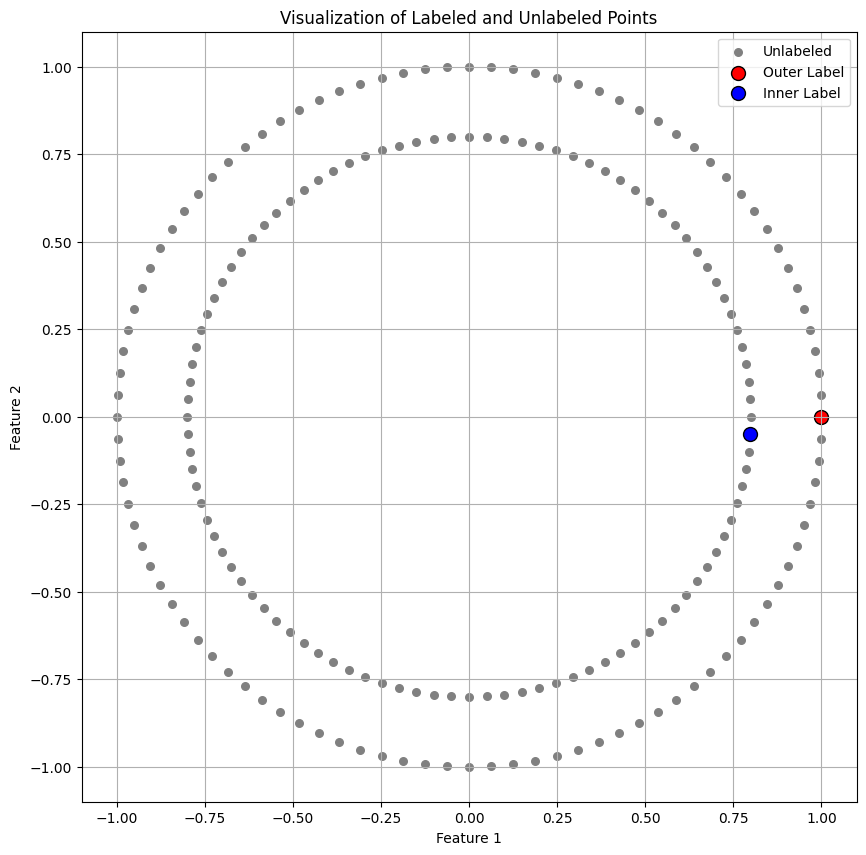

In [3]:
import matplotlib.pyplot as plt

# Create masks for different types of points
mask_labelled = (labels == 0) | (labels == 1)
mask_unlabelled = (labels == -1)
mask_outer = (labels == 0)
mask_inner = (labels == 1)

# Plot
plt.figure(figsize=(10, 10))
plt.scatter(X[mask_unlabelled, 0], X[mask_unlabelled, 1], color='gray', label='Unlabeled', s=30)
plt.scatter(X[mask_outer, 0], X[mask_outer, 1], color='red', label='Outer Label', s=100, edgecolor='black')
plt.scatter(X[mask_inner, 0], X[mask_inner, 1], color='blue', label='Inner Label', s=100, edgecolor='black')

plt.title('Visualization of Labeled and Unlabeled Points')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

First Attempt

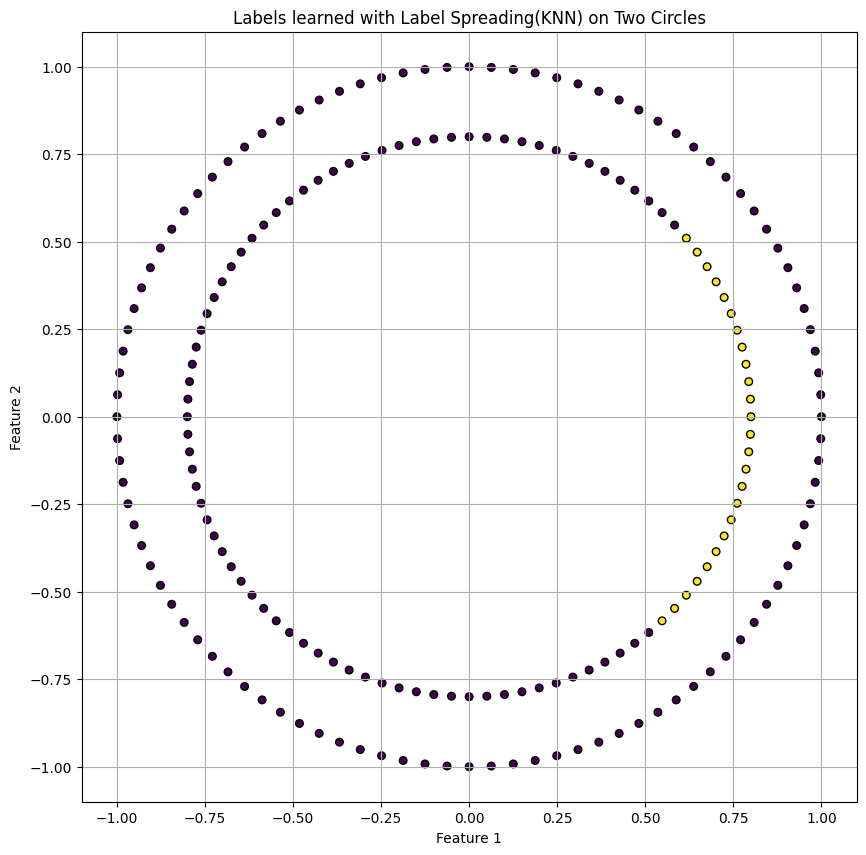

In [4]:
from sklearn.semi_supervised import LabelSpreading

# Initialize and fit the Label Spreading model with KNN kernel's default values
label_spreading = LabelSpreading(kernel='knn',n_neighbors=7,alpha=0.2)
label_spreading.fit(X, labels)

# Predict labels for all data points
predicted_labels = label_spreading.transduction_

# Plot the results
plt.figure(figsize=(10, 10))
plt.scatter(X[:, 0], X[:, 1], c=predicted_labels, s=30, edgecolor='k')
plt.title('Labels learned with Label Spreading(KNN) on Two Circles')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()

c:\Users\manir\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\semi_supervised\_label_propagation.py:322: ConvergenceWarning: max_iter=30 was reached without convergence.
  warnings.warn(
c:\Users\manir\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\semi_supervised\_label_propagation.py:322: ConvergenceWarning: max_iter=30 was reached without convergence.
  warnings.warn(


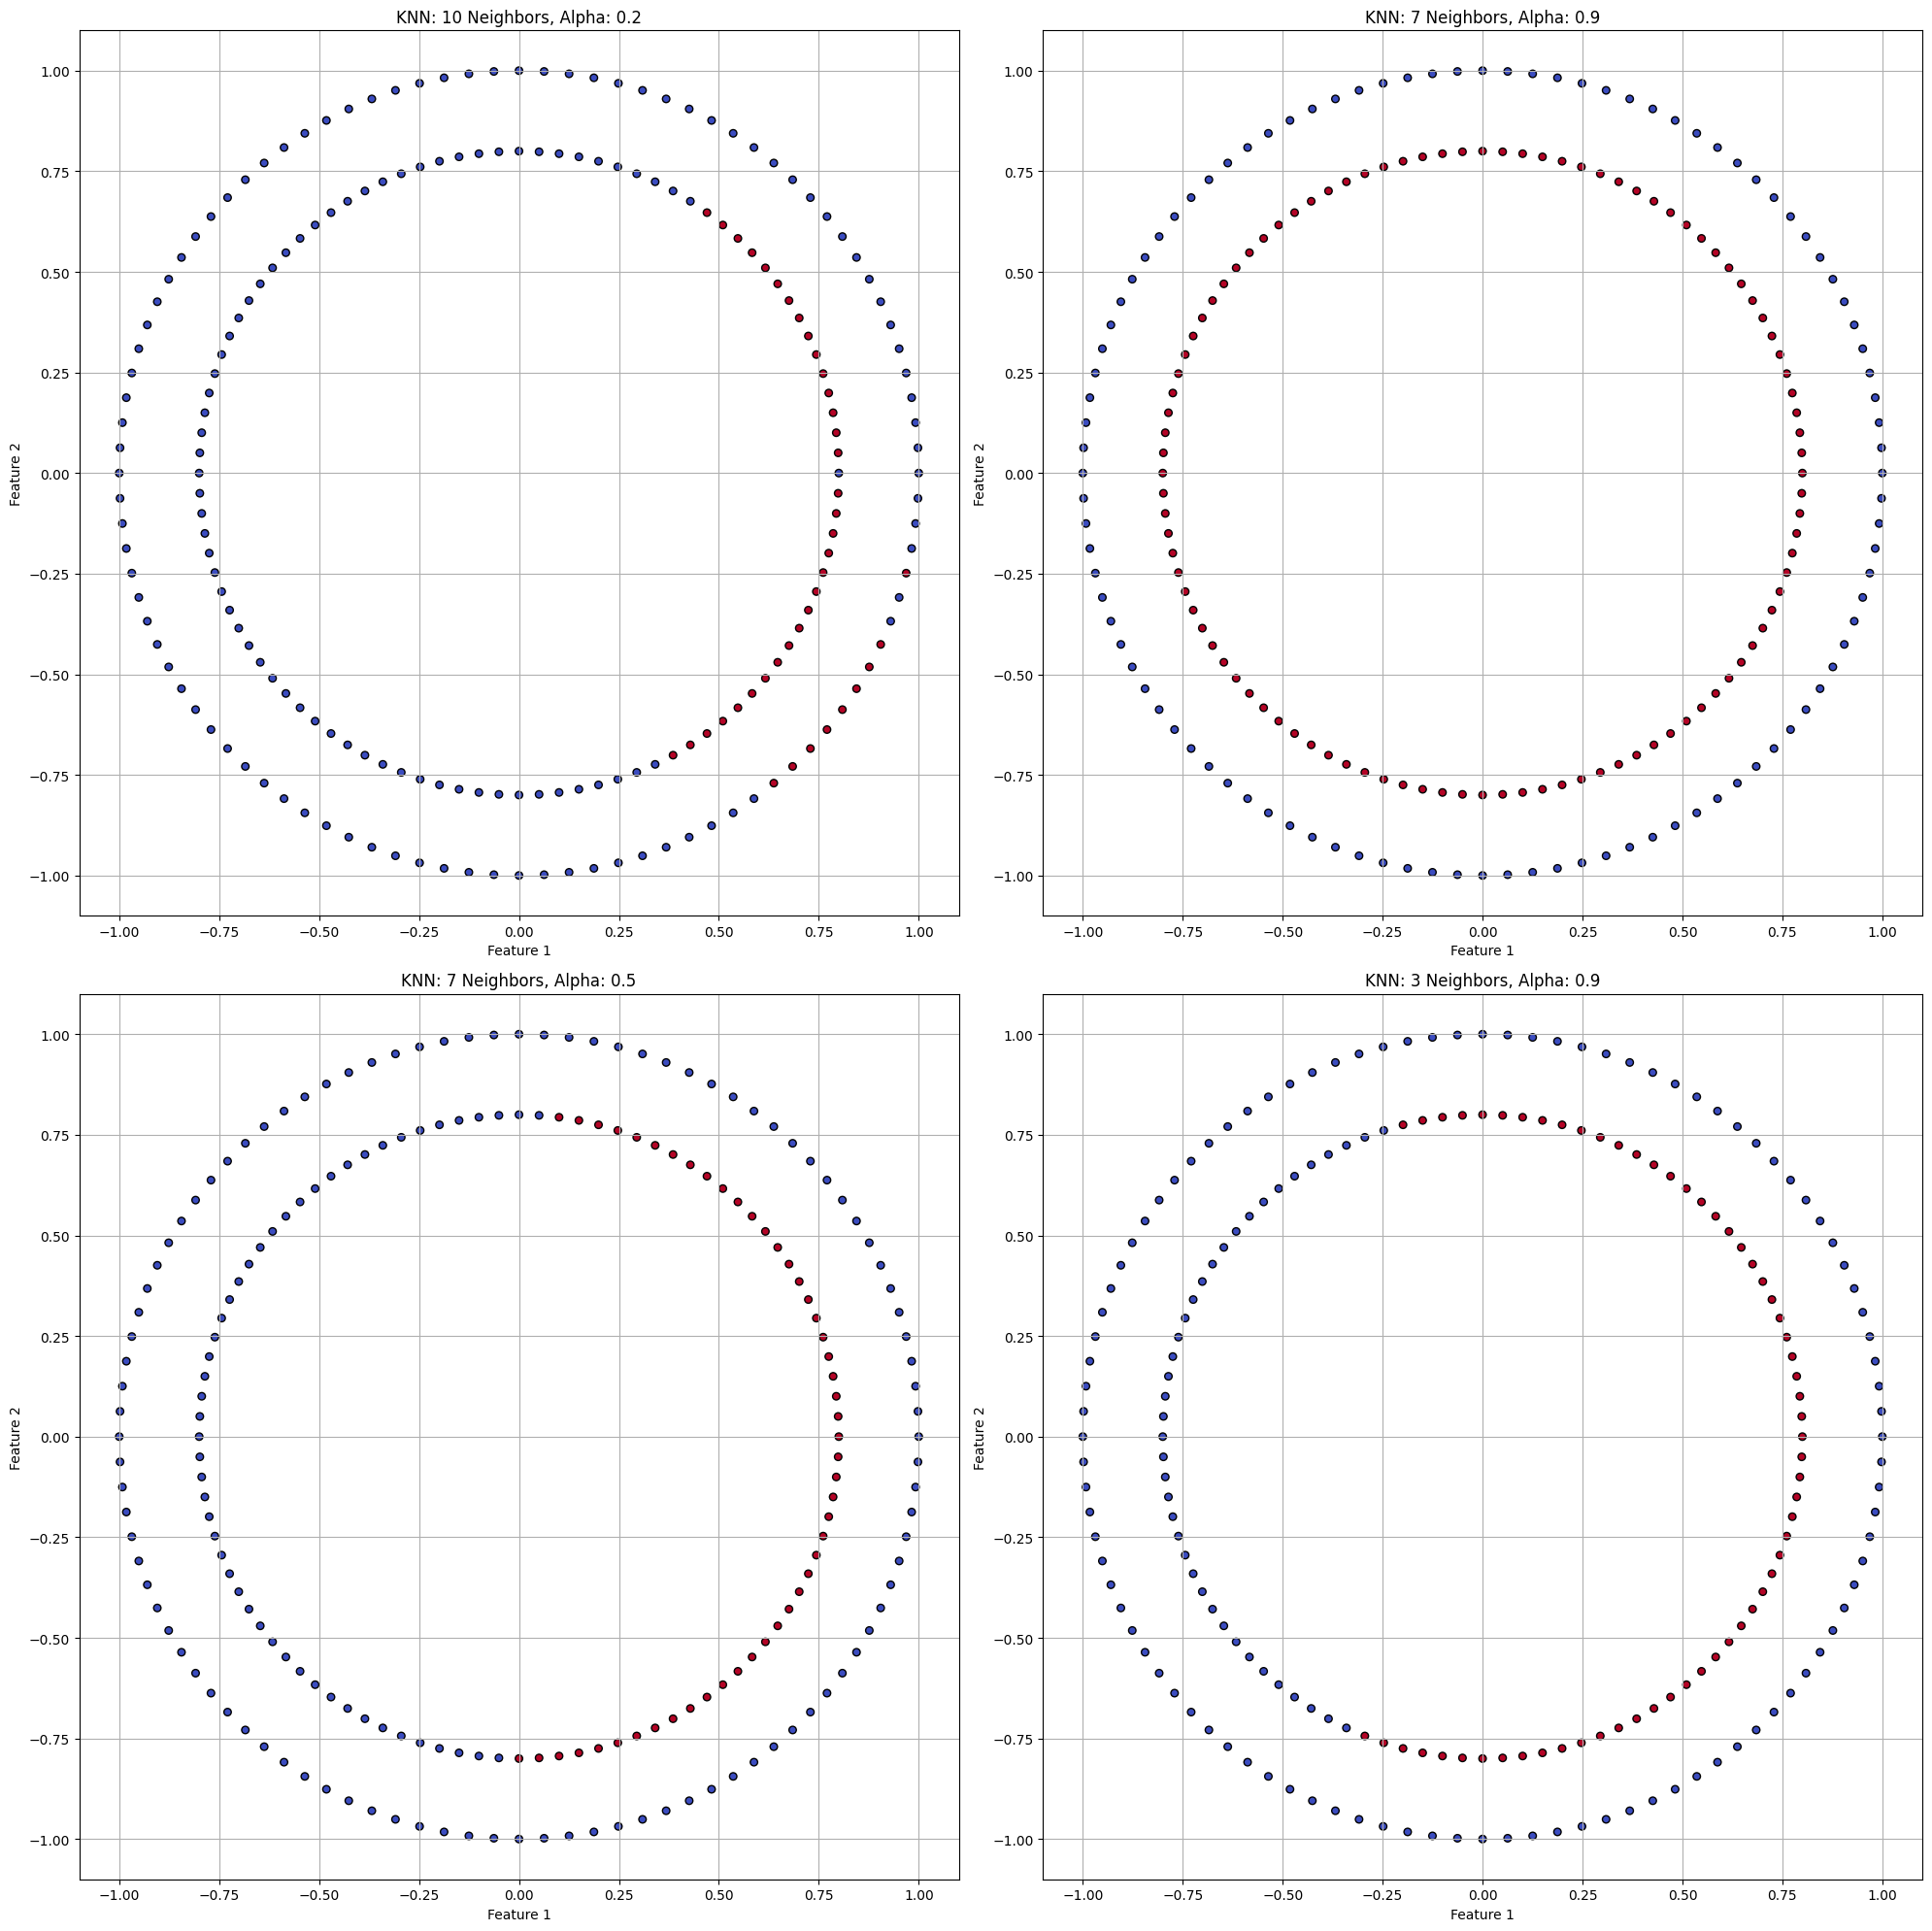

In [9]:
# List of model configurations with valid alpha values
model_configs = [
    {"kernel": "knn", "n_neighbors": 10, "alpha": 0.2, "title": "KNN: 10 Neighbors, Alpha: 0.2"}, #default alpha, but more neighbors
    {"kernel": "knn", "n_neighbors": 7, "alpha": 0.9, "title": "KNN: 7 Neighbors, Alpha: 0.9"}, #default neighbors, but most alpha
    {"kernel": "knn", "n_neighbors": 7, "alpha": 0.5, "title": "KNN: 7 Neighbors, Alpha: 0.5"},#default neighbors, but more alpha
    {"kernel": "knn", "n_neighbors": 3, "alpha": 0.9, "title": "KNN: 3 Neighbors, Alpha: 0.9"} #decreased neighbors, but most alpha
]

# Loop through each model configuration, fit, predict, and plot
plt.figure(figsize=(20, 20))
for i, config in enumerate(model_configs, 1):
    # Create and fit the model
    label_spreading = LabelSpreading(kernel=config["kernel"], n_neighbors=config["n_neighbors"], alpha=config["alpha"])
    label_spreading.fit(X, labels)
    
    # Predict labels
    predicted_labels = label_spreading.transduction_

    # Plot the results
    plt.subplot(2, 2, i)
    plt.scatter(X[:, 0], X[:, 1], c=predicted_labels, s=30, cmap='coolwarm', edgecolor='k')
    plt.title(config["title"])
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.grid(True)

plt.tight_layout()
plt.show()


we can see that #default neighbors, but most alpha is the required answer , so on fine tuning we get the Final Iteration

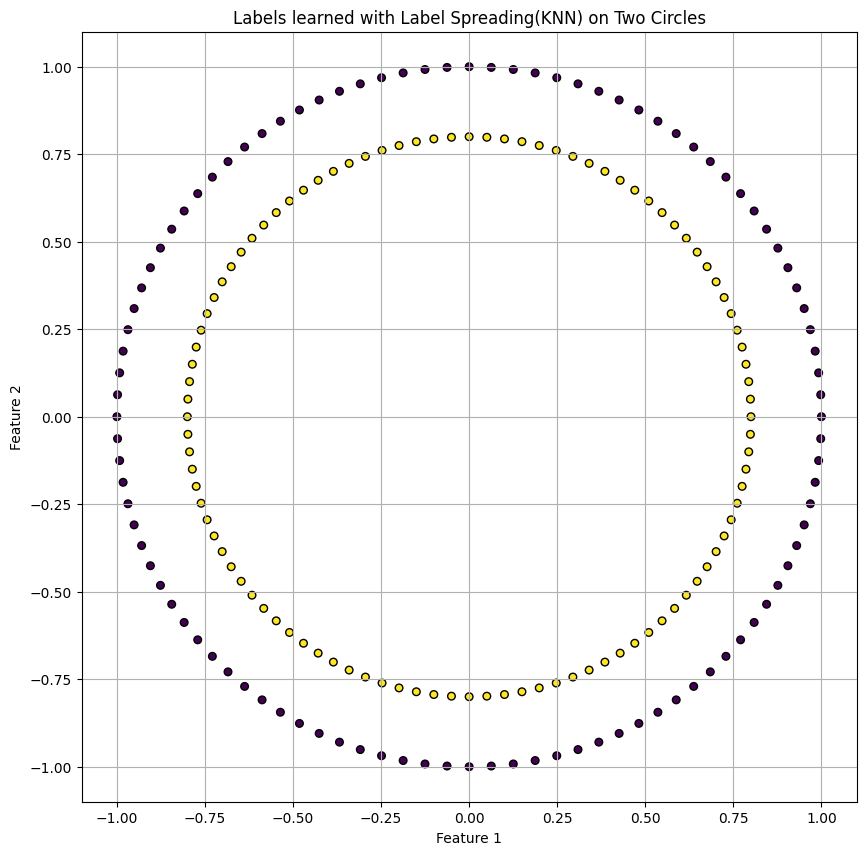

In [ ]:
# Initialize and fit the Label Spreading model
label_spreading = LabelSpreading(kernel='knn', n_neighbors=7,alpha=0.8)
label_spreading.fit(X, labels)

# Predict labels for all data points
predicted_labels = label_spreading.transduction_

# Plot the results
plt.figure(figsize=(10, 10))
plt.scatter(X[:, 0], X[:, 1], c=predicted_labels, s=30, edgecolor='k')
plt.title('Labels learned with Label Spreading(KNN) on Two Circles')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()

Reference
https://scikit-learn.org/dev/modules/generated/sklearn.semi_supervised.LabelSpreading.html